In [113]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2

In [55]:
DIR = "C:\\Users\\PKS\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Data set\\leaf_images"

In [56]:
DIR

'C:\\Users\\PKS\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Data set\\leaf_images'

In [27]:
train = pd.read_csv(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train.csv")

In [28]:
train

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [29]:
test = pd.read_csv(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\test.csv")

In [30]:
test

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [31]:
image1 = Image.open(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\leaf_images\Test_0.jpg")

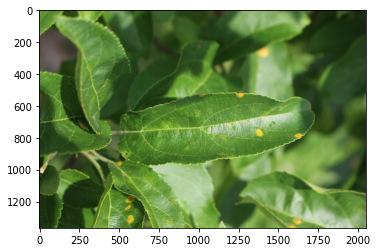

In [33]:
plt.imshow(image1)
plt.show()

In [39]:
# pre processing

In [34]:
class_names =train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [37]:
number =0
train['label'] =0

for i in class_names:
    train['label'] = train['label']+train[i]*number
    number = number +1

In [38]:
train

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2


In [51]:
def get_labled_image(img):
    if search("Train",img):
        img = img.split('.')[0]
        label = train.loc[train['image_id']==img]['label']
        return label
    
    

In [52]:
# nat sort is used to arrange the images in a chronological order

In [57]:
natsort.natsorted(os.listdir(DIR))

['Test_0.jpg',
 'Test_1.jpg',
 'Test_2.jpg',
 'Test_3.jpg',
 'Test_4.jpg',
 'Test_5.jpg',
 'Test_6.jpg',
 'Test_7.jpg',
 'Test_8.jpg',
 'Test_9.jpg',
 'Test_10.jpg',
 'Test_11.jpg',
 'Test_12.jpg',
 'Test_13.jpg',
 'Test_14.jpg',
 'Test_15.jpg',
 'Test_16.jpg',
 'Test_17.jpg',
 'Test_18.jpg',
 'Test_19.jpg',
 'Test_20.jpg',
 'Test_21.jpg',
 'Test_22.jpg',
 'Test_23.jpg',
 'Test_24.jpg',
 'Test_25.jpg',
 'Test_26.jpg',
 'Test_27.jpg',
 'Test_28.jpg',
 'Test_29.jpg',
 'Test_30.jpg',
 'Test_31.jpg',
 'Test_32.jpg',
 'Test_33.jpg',
 'Test_34.jpg',
 'Test_35.jpg',
 'Test_36.jpg',
 'Test_37.jpg',
 'Test_38.jpg',
 'Test_39.jpg',
 'Test_40.jpg',
 'Test_41.jpg',
 'Test_42.jpg',
 'Test_43.jpg',
 'Test_44.jpg',
 'Test_45.jpg',
 'Test_46.jpg',
 'Test_47.jpg',
 'Test_48.jpg',
 'Test_49.jpg',
 'Test_50.jpg',
 'Test_51.jpg',
 'Test_52.jpg',
 'Test_53.jpg',
 'Test_54.jpg',
 'Test_55.jpg',
 'Test_56.jpg',
 'Test_57.jpg',
 'Test_58.jpg',
 'Test_59.jpg',
 'Test_60.jpg',
 'Test_61.jpg',
 'Test_62.jpg',
 '

In [79]:
def create_data_train():
    images = natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label = get_labled_image(img)
        path = os.path.join(DIR,img)
        
        if search("Train",img):
            if(img.split("_")[1].split(".")[0]) and label.item() == 0:
                shutil.copy(path,r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\healthy")
            elif(img.split("_")[1].split(".")[0]) and label.item() == 1:
                shutil.copy(path,r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\multiple")
            elif(img.split("_")[1].split(".")[0]) and label.item() == 2:
                shutil.copy(path,r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\rust")
            elif(img.split("_")[1].split(".")[0]) and label.item() == 3:
                shutil.copy(path,r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\scab")
        elif search("Test",img):
             shutil.copy(path,r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\test")

In [82]:
# make directory
shutil.os.mkdir(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train")
shutil.os.mkdir(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\healthy")



In [83]:
shutil.os.mkdir(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\multiple")
shutil.os.mkdir(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\rust")
shutil.os.mkdir(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\train\scab")

shutil.os.mkdir(r"C:\Users\PKS\AppData\Local\Programs\Python\Python37\Scripts\Data set\test")

In [84]:
train_dir = create_data_train()

100%|██████████████████████████████████████████████████████████████████████████████| 3642/3642 [04:08<00:00, 14.65it/s]


# data pre processing

In [106]:
train_DIR = r"C:\\Users\\PKS\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Data set\\train"

In [107]:
train_DIR

'C:\\Users\\PKS\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Data set\\train'

In [108]:
categories =['healthy','multiple','rust','scab']

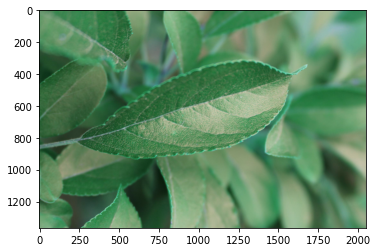

In [129]:
for j in categories:
    path=os.path.join(train_DIR,j)
    for img in os.listdir(path):
        image_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(image_array)
        plt.show()
        break
    break    

In [132]:
#resize the images
IMG_SIZE =250
new_image = cv2.resize(image_array,(IMG_SIZE,IMG_SIZE))

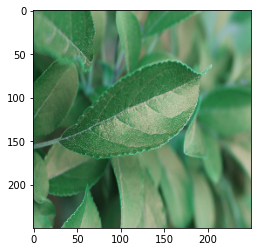

In [133]:
plt.imshow(new_image)
plt.show()

# Model prep

In [144]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation ,Dropout, Flatten , Conv2D,MaxPooling2D


In [148]:
# keeping a subset for training a model that is being used for training a model 

In [147]:
datagen = ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2 )

train_datagen=datagen.flow_from_directory('C:\\Users\\PKS\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Data set\\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=4,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory('C:\\Users\\PKS\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Data set\\train',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=4,
                                         class_mode='categorical',
                                         subset='validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [ ]:
# Conv2D (64 - nurons after input layer,(3,3)-filter size)

In [149]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 250, 250, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 128)       7